# Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [ ]:
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

# Redes neurais artificiais

In [ ]:
# Abrir o arquivo pickle e carregar os dados de treinamento e teste
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# Verificar a forma dos conjuntos de dados de treinamento
print("Estrutura do conjunto de treinamento de features:", X_credit_treinamento.shape)
print("Estrutura do conjunto de treinamento de rótulos:", y_credit_treinamento.shape)


Estrutura do conjunto de treinamento de features: (1500, 3)
Estrutura do conjunto de treinamento de rótulos: (1500,)


In [ ]:
# Verificar a estrutura dos conjuntos de dados de teste
print("Estrutura do conjunto de teste de features:", X_credit_teste.shape)
print("Estrutura do conjunto de teste de rótulos:", y_credit_teste.shape)


Estrutura do conjunto de teste de features: (500, 3)
Estrutura do conjunto de teste de rótulos: (500,)


In [ ]:
# regra empírica simples para estimar o número de neurônios em uma camada oculta de uma rede neural NÃO É UMA VERDADE ABSOLUTA APENAS UMA IDEIA DE APROXIMAÇÃO
neuronio = (3 + 1) / 2
print("Quantidade aproximada de neuronio da camada oculta: ", neuronio)

Quantidade aproximada de neuronio da camada oculta:  2.0


* A entrada é o número de características (ou dimensões) nos seus dados de entrada.
* A saída é o número de classes ou o número de valores que você está tentando prever.

In [ ]:
# Definir a arquitetura da rede neural para classificação
# A arquitetura consiste em 3 camadas ocultas com 20 neurônios cada
# A função de ativação usada é ReLU (Rectified Linear Unit)
# A camada de entrada tem 3 neurônios (correspondentes às features)
# A camada de saída tem 1 neurônio (para a classificação binária)
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver='adam', activation='relu',
                                   hidden_layer_sizes=(20, 20))

# Treinar a rede neural com os dados de treinamento
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)


Iteration 1, loss = 0.87191396
Iteration 2, loss = 0.77826008
Iteration 3, loss = 0.70377598
Iteration 4, loss = 0.64364862
Iteration 5, loss = 0.59454229
Iteration 6, loss = 0.55247774
Iteration 7, loss = 0.51646962
Iteration 8, loss = 0.48401268
Iteration 9, loss = 0.45393224
Iteration 10, loss = 0.42662974
Iteration 11, loss = 0.40122726
Iteration 12, loss = 0.37722580
Iteration 13, loss = 0.35576569
Iteration 14, loss = 0.33482244
Iteration 15, loss = 0.31542024
Iteration 16, loss = 0.29739832
Iteration 17, loss = 0.28000805
Iteration 18, loss = 0.26368319
Iteration 19, loss = 0.24811205
Iteration 20, loss = 0.23353651
Iteration 21, loss = 0.21976635
Iteration 22, loss = 0.20710924
Iteration 23, loss = 0.19542908
Iteration 24, loss = 0.18461138
Iteration 25, loss = 0.17471887
Iteration 26, loss = 0.16561762
Iteration 27, loss = 0.15715572
Iteration 28, loss = 0.14957851
Iteration 29, loss = 0.14263838
Iteration 30, loss = 0.13662332
Iteration 31, loss = 0.13089245
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
# Fazer previsões usando a rede neural treinada nos dados de teste
previsoes = rede_neural_credit.predict(X_credit_teste)
print("Previsões da rede neural nos dados de teste:\n ", previsoes)

Previsões da rede neural nos dados de teste:
  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 

In [ ]:
print("Rótulos reais dos dados de teste:\n", y_credit_teste)

Rótulos reais dos dados de teste:
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# Calcular e imprimir a precisão das previsões
precisao = accuracy_score(y_credit_teste, previsoes)
print("Precisão das previsões:", precisao)

Precisão das previsões: 0.998


Precisão da matriz de confusão: 0.998


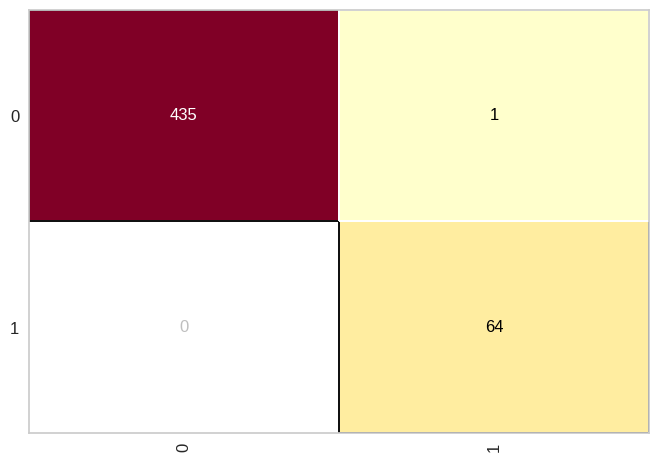

In [ ]:
# Criar uma instância da matriz de confusão para o classificador de rede neural
cm = ConfusionMatrix(rede_neural_credit)

# Treinar a matriz de confusão com os dados de treinamento
cm.fit(X_credit_treinamento, y_credit_treinamento)

# Avaliar a precisão da matriz de confusão com os dados de teste
precisao_cm = cm.score(X_credit_teste, y_credit_teste)
print("Precisão da matriz de confusão:", precisao_cm)


In [ ]:
# Imprimir o relatório de classificação para avaliar o desempenho do classificador
print("Relatório de Classificação:\n", classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



- **Precisão (Precision)**:
  - Para a classe "0" (baixo risco de crédito), o modelo previu corretamente todas as instâncias. Isso significa que todas as vezes em que o modelo disse que um cliente tinha baixo risco de crédito, ele estava correto.
  - Para a classe "1" (alto risco de crédito), o modelo previu corretamente a grande maioria das instâncias. No entanto, houve algumas instâncias em que o modelo previu alto risco quando, na verdade, não era o caso.

- **Revocação (Recall)**:
  - Tanto para a classe "0" quanto para a classe "1", o modelo identificou corretamente todas as instâncias. Isso significa que ele não deixou passar nenhum caso de baixo ou alto risco de crédito.

- **F1-Score**:
  - Para a classe "0", o F1-score é de 100%, o que indica um excelente equilíbrio entre precisão e recall. Isso significa que o modelo está acertando todas as previsões de baixo risco sem deixar nenhum caso de fora.
  - Para a classe "1", o F1-score é de 99%, o que é muito bom, mas sugere que há um pequeno número de falsos positivos, onde o modelo está prevendo alto risco de crédito quando não é o caso.

- **Acurácia (Accuracy)**:
  - A acurácia do modelo é de 100%, o que significa que ele está acertando todas as previsões, tanto para baixo quanto para alto risco de crédito. Isso é uma ótima notícia, indicando que o modelo está fazendo um trabalho excepcionalmente bom em classificar os clientes com base no risco de crédito.

